# Perceptron de Multiples Capas - MLP

Los perceptrones multicapas son un tipo de red neuronal formada por múltiples capas de neuronas. Esta configuración tiene la capacidad de resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón. 

Los perceptrones de multiples capas son conjuntos de perceptrones conectados, donde la salida de un perceptron en una de las capas es la entrada para una neurona en la siguiente capa. Esta estrategia permite extraer una representación fina de la información que entra a la red neuronal.

Los datos en la entrada pasan por un conjunto de capas de neuronas (llamadas capas ocultas) la salida de este conjunto de capas son la entrada para una neurona de salida de la cual obtenemos un único resultado. La siguiente Figura esquematiza la forma en que la información pasa a través de cada neurona en diferente capas.

![](https://drive.google.com/uc?id=1qtVjikjui3DqybyiH4ndbL9mS65T4zmx)


De la misma forma en la que un perceptron actualiza sus pesos, los MLP actualizan los pesos de todas sus neuronas en un proceso llamado *backpropagation* (o retropropagación). Este proceso es hecho por el *optimizador* que se encarga de calcular el gradiente de la función de error por cada peso de la red, estos pesos son actualizados en cada época y el objetivo es minimizar el error. 


![](https://drive.google.com/uc?id=15PgGM3v_m8qYENE96uOJrD29_o8p6kLq)

Las redes neuronales modernas usan una combinación de multiples capas y reciben el nombre de redes neuronales profundas ("Deep neural networks").

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] (64,)


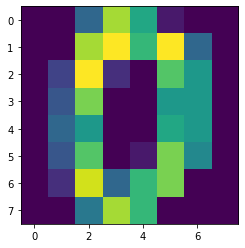

In [4]:
# Visualizar datos
print(digits['data'][0], np.shape(digits['data'][0]))
plt.imshow(digits['data'][0].reshape(8,8))

In [5]:
X = digits['data']
Y = digits['target']

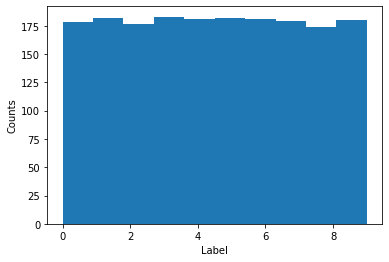

In [6]:
# Visualizar los datos
_ = plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Label')
plt.show()

In [7]:
# Separar los datos entre entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

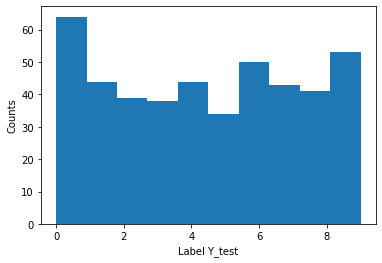

In [8]:
# Visualizar los datos
_ = plt.hist(Y_test)
plt.ylabel('Counts')
plt.xlabel('Label Y_test')
plt.show()

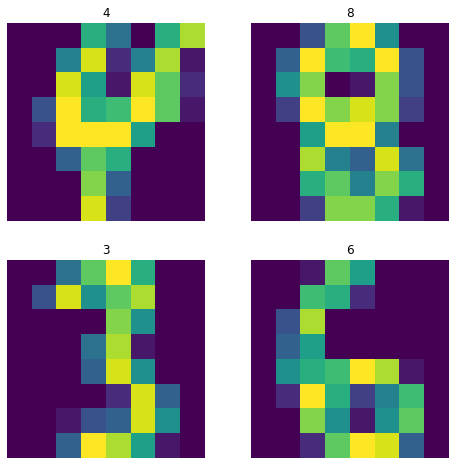

In [9]:
#-- Visualizamos los datos
fig = plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i*15].reshape(8,8))
    plt.title(Y_test[i*15])
    plt.axis(False)
plt.show()

In [18]:
# Definir la estructura del MLP
import torch

input_dim = 64
out_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 30),
    torch.nn.ReLU(),
    torch.nn.Linear(30, out_dim)
)
model

Sequential(
  (0): Linear(in_features=64, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=10, bias=True)
)

In [19]:
# Definir el optimizador y la función de perdida

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [20]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

n_epoch = 1000 # Número de épocas

#-- Listas de evaluación entrenamiento
loss_train = np.zeros(n_epoch)
f1_train = np.zeros(n_epoch)

#-- Listas de evaluación test
loss_test = np.zeros(n_epoch)
f1_test = np.zeros(n_epoch)

X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)

Y_train_tensor = torch.from_numpy(Y_train)
Y_test_tensor = torch.from_numpy(Y_test)


#-- Entrenamineto del MLP
for epoch in range(n_epoch):
    model.train()

    Y_pred = model(X_train_tensor.float())

    loss = criterion(Y_pred,Y_train_tensor)
    loss_train[epoch] = loss.item()

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train[epoch] = f1_score(Y_train,Y_pred, average='macro')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print( f'Epoch [{epoch+1}/{n_epoch}], loss: {loss_train[-1]}. f1:{f1_train[-1]}')

    model.eval()
    
    Y_pred = model(X_test_tensor.float())  
    loss = criterion(Y_pred,Y_test_tensor)
    loss_test[epoch] = loss.item()

    Y_pred = torch.argmax(Y_pred, 1)
    f1_test[epoch] = f1_score(Y_test, Y_pred, average='macro') 

Epoch [1/1000], loss: 0.0. f1:0.0
Epoch [2/1000], loss: 0.0. f1:0.0
Epoch [3/1000], loss: 0.0. f1:0.0
Epoch [4/1000], loss: 0.0. f1:0.0
Epoch [5/1000], loss: 0.0. f1:0.0
Epoch [6/1000], loss: 0.0. f1:0.0
Epoch [7/1000], loss: 0.0. f1:0.0
Epoch [8/1000], loss: 0.0. f1:0.0
Epoch [9/1000], loss: 0.0. f1:0.0
Epoch [10/1000], loss: 0.0. f1:0.0
Epoch [11/1000], loss: 0.0. f1:0.0
Epoch [12/1000], loss: 0.0. f1:0.0
Epoch [13/1000], loss: 0.0. f1:0.0
Epoch [14/1000], loss: 0.0. f1:0.0
Epoch [15/1000], loss: 0.0. f1:0.0
Epoch [16/1000], loss: 0.0. f1:0.0
Epoch [17/1000], loss: 0.0. f1:0.0
Epoch [18/1000], loss: 0.0. f1:0.0
Epoch [19/1000], loss: 0.0. f1:0.0
Epoch [20/1000], loss: 0.0. f1:0.0
Epoch [21/1000], loss: 0.0. f1:0.0
Epoch [22/1000], loss: 0.0. f1:0.0
Epoch [23/1000], loss: 0.0. f1:0.0
Epoch [24/1000], loss: 0.0. f1:0.0
Epoch [25/1000], loss: 0.0. f1:0.0
Epoch [26/1000], loss: 0.0. f1:0.0
Epoch [27/1000], loss: 0.0. f1:0.0
Epoch [28/1000], loss: 0.0. f1:0.0
Epoch [29/1000], loss: 0.0. f

Epoch [245/1000], loss: 0.0. f1:0.0
Epoch [246/1000], loss: 0.0. f1:0.0
Epoch [247/1000], loss: 0.0. f1:0.0
Epoch [248/1000], loss: 0.0. f1:0.0
Epoch [249/1000], loss: 0.0. f1:0.0
Epoch [250/1000], loss: 0.0. f1:0.0
Epoch [251/1000], loss: 0.0. f1:0.0
Epoch [252/1000], loss: 0.0. f1:0.0
Epoch [253/1000], loss: 0.0. f1:0.0
Epoch [254/1000], loss: 0.0. f1:0.0
Epoch [255/1000], loss: 0.0. f1:0.0
Epoch [256/1000], loss: 0.0. f1:0.0
Epoch [257/1000], loss: 0.0. f1:0.0
Epoch [258/1000], loss: 0.0. f1:0.0
Epoch [259/1000], loss: 0.0. f1:0.0
Epoch [260/1000], loss: 0.0. f1:0.0
Epoch [261/1000], loss: 0.0. f1:0.0
Epoch [262/1000], loss: 0.0. f1:0.0
Epoch [263/1000], loss: 0.0. f1:0.0
Epoch [264/1000], loss: 0.0. f1:0.0
Epoch [265/1000], loss: 0.0. f1:0.0
Epoch [266/1000], loss: 0.0. f1:0.0
Epoch [267/1000], loss: 0.0. f1:0.0
Epoch [268/1000], loss: 0.0. f1:0.0
Epoch [269/1000], loss: 0.0. f1:0.0
Epoch [270/1000], loss: 0.0. f1:0.0
Epoch [271/1000], loss: 0.0. f1:0.0
Epoch [272/1000], loss: 0.0.

Epoch [488/1000], loss: 0.0. f1:0.0
Epoch [489/1000], loss: 0.0. f1:0.0
Epoch [490/1000], loss: 0.0. f1:0.0
Epoch [491/1000], loss: 0.0. f1:0.0
Epoch [492/1000], loss: 0.0. f1:0.0
Epoch [493/1000], loss: 0.0. f1:0.0
Epoch [494/1000], loss: 0.0. f1:0.0
Epoch [495/1000], loss: 0.0. f1:0.0
Epoch [496/1000], loss: 0.0. f1:0.0
Epoch [497/1000], loss: 0.0. f1:0.0
Epoch [498/1000], loss: 0.0. f1:0.0
Epoch [499/1000], loss: 0.0. f1:0.0
Epoch [500/1000], loss: 0.0. f1:0.0
Epoch [501/1000], loss: 0.0. f1:0.0
Epoch [502/1000], loss: 0.0. f1:0.0
Epoch [503/1000], loss: 0.0. f1:0.0
Epoch [504/1000], loss: 0.0. f1:0.0
Epoch [505/1000], loss: 0.0. f1:0.0
Epoch [506/1000], loss: 0.0. f1:0.0
Epoch [507/1000], loss: 0.0. f1:0.0
Epoch [508/1000], loss: 0.0. f1:0.0
Epoch [509/1000], loss: 0.0. f1:0.0
Epoch [510/1000], loss: 0.0. f1:0.0
Epoch [511/1000], loss: 0.0. f1:0.0
Epoch [512/1000], loss: 0.0. f1:0.0
Epoch [513/1000], loss: 0.0. f1:0.0
Epoch [514/1000], loss: 0.0. f1:0.0
Epoch [515/1000], loss: 0.0.

Epoch [743/1000], loss: 0.0. f1:0.0
Epoch [744/1000], loss: 0.0. f1:0.0
Epoch [745/1000], loss: 0.0. f1:0.0
Epoch [746/1000], loss: 0.0. f1:0.0
Epoch [747/1000], loss: 0.0. f1:0.0
Epoch [748/1000], loss: 0.0. f1:0.0
Epoch [749/1000], loss: 0.0. f1:0.0
Epoch [750/1000], loss: 0.0. f1:0.0
Epoch [751/1000], loss: 0.0. f1:0.0
Epoch [752/1000], loss: 0.0. f1:0.0
Epoch [753/1000], loss: 0.0. f1:0.0
Epoch [754/1000], loss: 0.0. f1:0.0
Epoch [755/1000], loss: 0.0. f1:0.0
Epoch [756/1000], loss: 0.0. f1:0.0
Epoch [757/1000], loss: 0.0. f1:0.0
Epoch [758/1000], loss: 0.0. f1:0.0
Epoch [759/1000], loss: 0.0. f1:0.0
Epoch [760/1000], loss: 0.0. f1:0.0
Epoch [761/1000], loss: 0.0. f1:0.0
Epoch [762/1000], loss: 0.0. f1:0.0
Epoch [763/1000], loss: 0.0. f1:0.0
Epoch [764/1000], loss: 0.0. f1:0.0
Epoch [765/1000], loss: 0.0. f1:0.0
Epoch [766/1000], loss: 0.0. f1:0.0
Epoch [767/1000], loss: 0.0. f1:0.0
Epoch [768/1000], loss: 0.0. f1:0.0
Epoch [769/1000], loss: 0.0. f1:0.0
Epoch [770/1000], loss: 0.0.

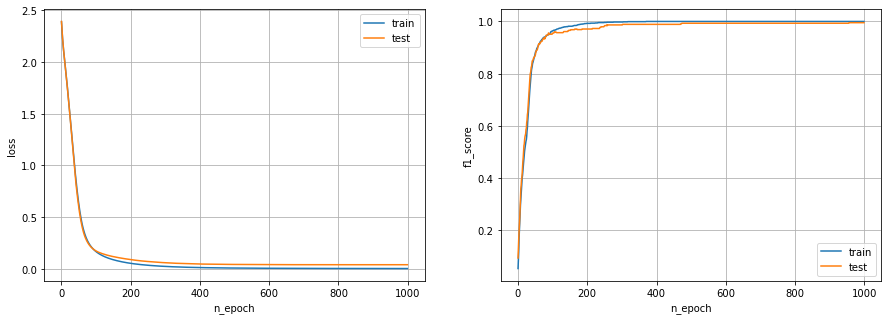

In [21]:
#-- Visualizamos las curvas de entrenamiento y testeo

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_test, label='test')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_test, label='test')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()

plt.show()

In [25]:
np.argmin(np.array(loss_test)[np.array(f1_train) < 1]), min(np.array(loss_test)[np.array(f1_train) < 1])

(369, 0.04743681102991104)